# ML & AI Learning Path - Practical Project

**POD 2:**
 <br>
 Aleksandr Vystoropskyi
 <br>
 Kevin Mochi
 <br>
 Mike Leske
 <br>
 Selim Budakoglu

### Index

Part 1 - [Data cleansing and explanatory data analysis](#data_cleansing)
<br>
Part 2 - [Modelling](#modelling)

In [1]:
# Uncomment for initialization of the workspace in Google Colab

# !pip uninstall -y kaggle
# !pip install --upgrade pip
# !pip install kaggle==1.5.6
# import os
# os.environ['KAGGLE_USERNAME'] = 'ovystoro'
# os.environ['KAGGLE_KEY'] = 'd653822e4926da1ec5b6814c9cc57148'
# !kaggle competitions download -c new-york-city-taxi-fare-prediction
# !rm -rf sample_data/
# !unzip -q new-york-city-taxi-fare-prediction.zip

In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("train.csv", nrows = 500000)
test = pd.read_csv("test.csv")

<a id='data_cleansing'></a>

# Part 1 - Data cleansing and explanatory data analysis

Will perform the following activities:
* Shape of train and test sets
* Check for NaNs and drop them (if any)
* Check for outliers and drop them (if any)
* Type conversion of relevant fields

In [4]:
train.shape

(500000, 8)

In [5]:
test.shape

(9914, 7)

In [6]:
train.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [7]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000
mean,11.358361,-72.519958,39.920276,-72.522435,39.916526,1.683428
std,9.916617,11.856831,8.073475,11.797362,7.391002,1.307395
min,-44.900000,-2986.242495,-3116.285383,-3383.296608,-2559.748913,0.000000
25%,6.000000,-73.992047,40.734917,-73.991382,40.734057,1.000000
50%,8.500000,-73.981785,40.752670,-73.980126,40.753152,1.000000
75%,12.500000,-73.967117,40.767076,-73.963572,40.768135,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [8]:
#Check for missing values in train data
train.isnull().sum().sort_values(ascending=False)

dropoff_latitude     5
dropoff_longitude    5
passenger_count      0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
key                  0
dtype: int64

In [9]:
train[train['dropoff_latitude'].isnull()]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
120227,2012-12-11 12:57:00.00000013,12.5,2012-12-11 12:57:00 UTC,-73.992760,40.743098,NaN,NaN,0
245696,2013-03-21 18:07:07.0000001,86.5,2013-03-21 18:07:07 UTC,-73.991572,40.740591,NaN,NaN,0
340533,2012-12-11 12:50:52.00000010,27.5,2012-12-11 12:50:52 UTC,-73.979639,40.784742,NaN,NaN,0
428108,2011-09-08 09:12:52.0000001,11.8,2011-09-08 09:12:52 UTC,-73.987041,40.751542,NaN,NaN,0
471472,2012-12-11 12:34:20.0000006,7.8,2012-12-11 12:34:20 UTC,0.000000,0.000000,NaN,NaN,0


In [10]:
#Check for missing values in test data
test.isnull().sum().sort_values(ascending=False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
key                  0
dtype: int64

In [11]:
#Drop the missing values
train = train.drop(train[train.isnull().any(1)].index, axis = 0)

In [12]:
train.shape

(499995, 8)

In [13]:
#check the target column
train['fare_amount'].describe()

count    499995.000000
mean         11.358182
std           9.916069
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

Negative fare values may be due to a refund, typo or other error. Anyhow they are of no use for our analysis and they will be removed.

In [14]:
#Fields have negative fare_amount values.
from collections import Counter
Counter(train['fare_amount']<0)

Counter({False: 499974, True: 21})

In [15]:
#With full dataset 
# train = train.drop(train[train['fare_amount']>3000].index, axis = 0)

In [16]:
train = train.drop(train[train['fare_amount']<0].index, axis=0)
train.shape

(499974, 8)

In [17]:
#All negative values have been removed
train['fare_amount'].describe()

count    499974.000000
mean         11.358926
std           9.915433
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [18]:
train['fare_amount'].sort_values(ascending=False)

101885    500.00
247671    495.00
287638    450.00
233874    450.00
329010    450.00
451974    400.00
361793    400.00
130460    281.05
309769    263.25
142550    255.00
351584    250.00
217225    245.41
149769    240.00
168218    235.00
202499    225.00
196990    217.00
225249    215.00
416989    215.00
285659    214.33
110337    212.00
215662    211.44
479052    210.00
339882    208.80
494480    208.00
207267    205.00
224160    201.00
249649    200.00
28373     200.00
182993    200.00
182346    200.00
           ...  
350041      2.50
75133       2.50
407372      2.50
243610      2.50
151821      2.50
350089      2.50
84726       2.50
486695      2.50
448752      2.50
243484      2.50
185771      1.50
90010       0.01
2780        0.01
194169      0.01
217967      0.01
281142      0.01
489767      0.00
386734      0.00
431819      0.00
266485      0.00
27891       0.00
331597      0.00
47302       0.00
105051      0.00
10002       0.00
436658      0.00
495273      0.00
175352      0.

Next, the passenger_count variable will be checked

In [19]:
train['passenger_count'].describe()

count    499974.000000
mean          1.683440
std           1.307383
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

Assuming that the max capacity of a taxi is 6 passengers, any value above has to be considered an outlier. Lets drop it 

In [20]:
train = train.drop(train[train['passenger_count']>6].index, axis = 0)

In [21]:
#The max number of passengers is now 6
train['passenger_count'].describe()

count    499974.000000
mean          1.683440
std           1.307383
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [22]:
#Next, let us explore the pickup latitude and longitudes
train['pickup_latitude'].describe()

count    499974.000000
mean         39.920315
std           8.073485
min       -3116.285383
25%          40.734917
50%          40.752670
75%          40.767076
max        1703.092772
Name: pickup_latitude, dtype: float64

An external search confirmed the following:
* Latitudes range from -90 to 90.
* Longitudes range from -180 to 180.

The above describe clearly shows some outliers. Let's filter them

In [23]:
train[train['pickup_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
150559,2012-08-03 07:43:00.000000176,25.3,2012-08-03 07:43:00 UTC,0.000000,-3116.285383,-73.953600,40.787998,1
436233,2012-03-11 01:56:00.000000100,4.1,2012-03-11 01:56:00 UTC,-2986.242495,-880.627428,-3383.296608,-2559.748913,1


In [24]:
train[train['pickup_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1
174356,2011-11-21 21:36:00.00000081,9.7,2011-11-21 21:36:00 UTC,2140.601160,1703.092772,-1251.195890,-1189.615440,1
272439,2011-04-23 02:55:00.00000012,9.3,2011-04-23 02:55:00 UTC,-74.002497,405.350000,-73.978600,40.739962,1
464025,2012-03-05 20:58:00.0000009,6.9,2012-03-05 20:58:00 UTC,-73.994268,404.966667,-73.973857,40.755457,1


We need to drop these outliers

In [25]:
train = train.drop(train.loc[(train['pickup_latitude']<-90) | (train['pickup_latitude']>90)].index, axis=0)

In [26]:
train.shape

(499968, 8)

In [27]:
#Similar operation for pickup longitude
train['pickup_longitude'].describe()

count    499968.000000
mean        -72.518766
std          10.667481
min        -740.000000
25%         -73.992047
50%         -73.981785
75%         -73.967117
max          40.812887
Name: pickup_longitude, dtype: float64

In [28]:
train[train['pickup_longitude']<-180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
60442,2012-01-12 13:36:00.000000186,4.9,2012-01-12 13:36:00 UTC,-736.550000,40.738230,-73.988742,40.748847,1
217355,2012-06-03 23:21:00.00000077,6.1,2012-06-03 23:21:00 UTC,-740.000000,40.747620,0.000000,0.000000,6
243342,2012-08-02 10:38:00.000000111,7.3,2012-08-02 10:38:00 UTC,-736.333333,40.766480,-73.987928,40.751742,3
351119,2012-02-03 07:53:00.000000135,4.1,2012-02-03 07:53:00 UTC,-736.483332,40.766512,-73.981992,40.771672,1
370663,2012-05-04 23:19:00.000000261,6.1,2012-05-04 23:19:00 UTC,-736.516667,40.719095,-74.003952,40.729860,1
416859,2012-07-21 15:23:00.00000093,6.5,2012-07-21 15:23:00 UTC,-736.416665,40.752285,-73.992565,40.742687,1


In [29]:
train[train['pickup_longitude']>180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [30]:
train = train.drop(train.loc[(train['pickup_longitude']<-180) | (train['pickup_longitude']>180)].index, axis=0)

In [31]:
train.shape

(499962, 8)

In [32]:
#Similar operation for dropoff latitude and longitude
train[train['dropoff_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [33]:
train[train['dropoff_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
92310,2011-09-27 11:54:00.000000127,28.9,2011-09-27 11:54:00 UTC,-74.014595,40.681880,-73.973310,404.616667,1
181973,2012-01-03 09:04:00.000000130,6.5,2012-01-03 09:04:00 UTC,-74.008918,40.717827,-74.000855,404.133332,1
335675,2012-02-26 00:25:00.00000085,19.3,2012-02-26 00:25:00 UTC,-74.006457,40.743865,-73.981283,404.133332,1


In [34]:
train = train.drop(train.loc[(train['dropoff_latitude']<-90) | (train['dropoff_latitude']>90)].index, axis=0)

In [35]:
train.shape

(499959, 8)

In [36]:
train[train['dropoff_latitude']<-180]|train[train['dropoff_latitude']>180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


Checking the data types of each column

In [37]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

Key and pickup_datetime seem to be datetime columns which are in object format. Let's convert them to datetime

In [38]:
#pd.to_datetime is slow!
# %timeit pd.to_datetime(s_c)
# 1 loops, best of 3: 1.14 s per loop

# %timeit pd.to_datetime(s_c, infer_datetime_format=True)
# 10 loops, best of 3: 105 ms per loop

# %timeit pd.to_datetime(s_c, format="%Y/%m/%d %H:%M:%S")
# 10 loops, best of 3: 99.5 ms per loop

train['key'] = pd.to_datetime(train['key'], infer_datetime_format=True)
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'], infer_datetime_format=True)


In [39]:
#Convert for test data 
test['key'] = pd.to_datetime(test['key'], infer_datetime_format=True)
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'], infer_datetime_format=True)

In [40]:
#Check the dtypes after conversion
train.dtypes

key                  datetime64[ns]
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [41]:
test.dtypes

key                  datetime64[ns]
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [42]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [43]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1


### Hypotesis on price influencers:
1. Number of passengers
2. Date & time
3. Day of the week
4. Distance travelled

First, let's split the datetime field 'pickup_datetime' to the following - 
* year
* month
* date
* hour
* day of week

New field 'distance' required to fetch the distance between the pickup and the drop.

We can calulate the distance in a sphere when latitudes and longitudes are given by [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)

**haversine(θ) = sin²(θ/2)**

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

**a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)**

**c = 2 * atan2( √a, √(1−a) )**

**d = R ⋅ c**

**d = Haversine distance**

*Refer [this](https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula) page for more info and examples on Haversine formula*

In [44]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [45]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081663
9898     0.555287
9899     5.610506
9900     1.890608
9901     1.530118
9902     3.891525
9903     2.299316
9904    15.091263
9905     9.613797
9906     0.369506
9907     9.923999
9908     1

In [46]:
train['H_Distance'].head(10)

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
5    3.787239
6    1.555807
7    4.155444
8    1.253232
9    2.849627
Name: H_Distance, dtype: float64

In [47]:
test['H_Distance'].head(10)

0     2.323260
1     2.425353
2     0.618628
3     1.961033
4     5.387301
5     3.222549
6     0.929601
7    21.540102
8     3.873962
9     1.099794
Name: H_Distance, dtype: float64

In [48]:
train.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
5,2011-01-06 09:50:45.000000200,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,3.787239
6,2012-11-20 20:35:00.000000100,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,1.555807
7,2012-01-04 17:22:00.000000810,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,4.155444
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,1.253232
9,2009-09-02 01:11:00.000000830,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,2.849627


In [49]:
test.head(10)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323260
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301
5,2012-12-01 21:12:12.000000500,2012-12-01 21:12:12,-73.960983,40.765547,-73.979177,40.740053,1,3.222549
6,2011-10-06 12:10:20.000000100,2011-10-06 12:10:20,-73.949013,40.773204,-73.959622,40.770893,1,0.929601
7,2011-10-06 12:10:20.000000300,2011-10-06 12:10:20,-73.777282,40.646636,-73.985083,40.759368,1,21.540102
8,2011-10-06 12:10:20.000000200,2011-10-06 12:10:20,-74.014099,40.709638,-73.995106,40.741365,1,3.873962
9,2014-02-18 15:22:20.000000200,2014-02-18 15:22:20,-73.969582,40.765519,-73.980686,40.770725,1,1.099794


Now that we have calculated the distance, we shall create columns for the following:
* Year
* Month
* Date
* Hour
* Day of week

In [50]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [51]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7


In [52]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,2015,1,27,1,13
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21


**1. Does the number of passengers affect the fare?**

Text(0, 0.5, 'Frequency')

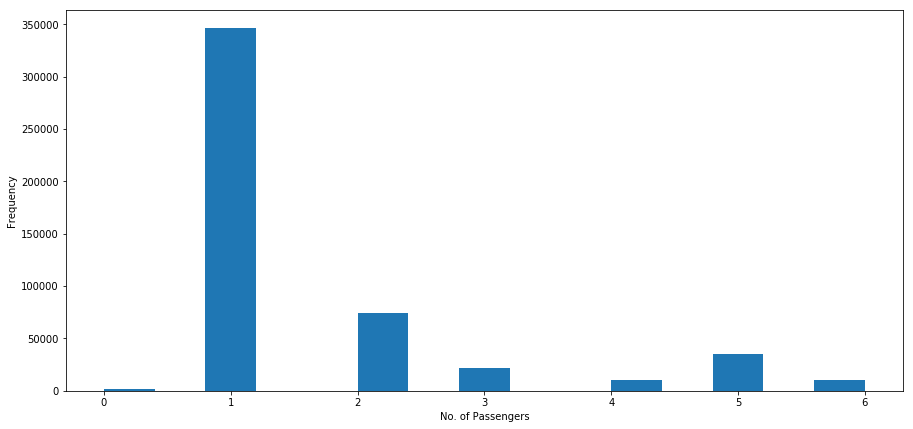

In [53]:
plt.figure(figsize=(15,7))
plt.hist(train['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

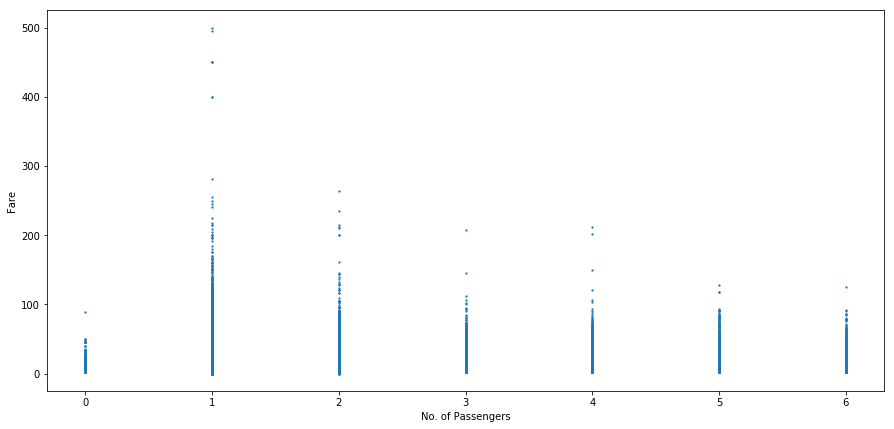

In [54]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

From the above 2 graphs we can see that single passengers are the most frequent travellers, and the highest fare also seems to come from cabs which carry just 1 passenger.

**2. Does the date and time of pickup affect the fare?**

Text(0, 0.5, 'Fare')

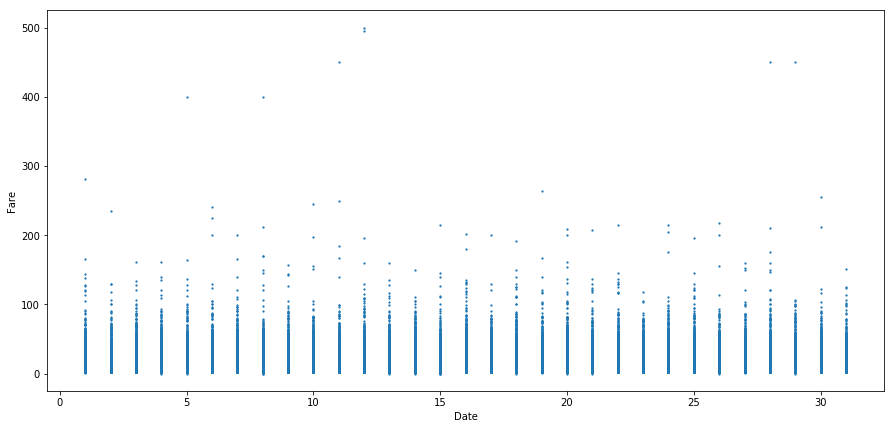

In [55]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

The fares throught the month mostly seem uniform, with the maximum fare received on the 12th

Text(0, 0.5, 'Frequency')

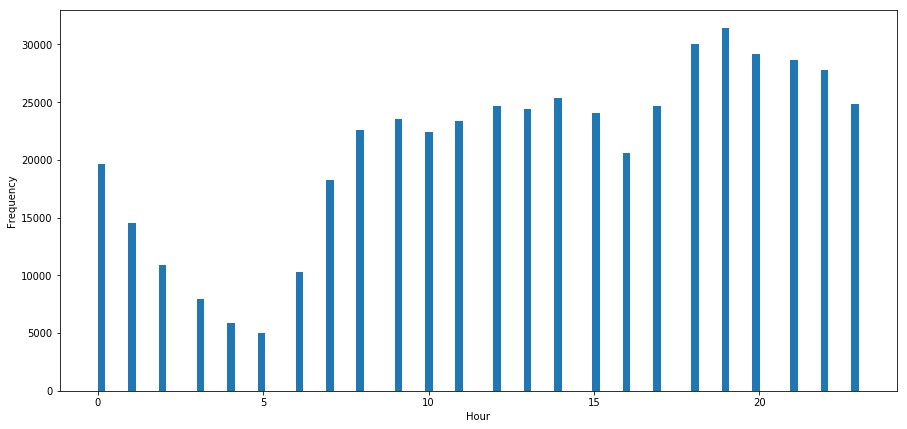

In [56]:
plt.figure(figsize=(15,7))
plt.hist(train['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

The time of day definitely plays an important role. The frequency of cab rides seem to be the lowest at 5AM and the highest at 7PM.

Text(0, 0.5, 'Fare')

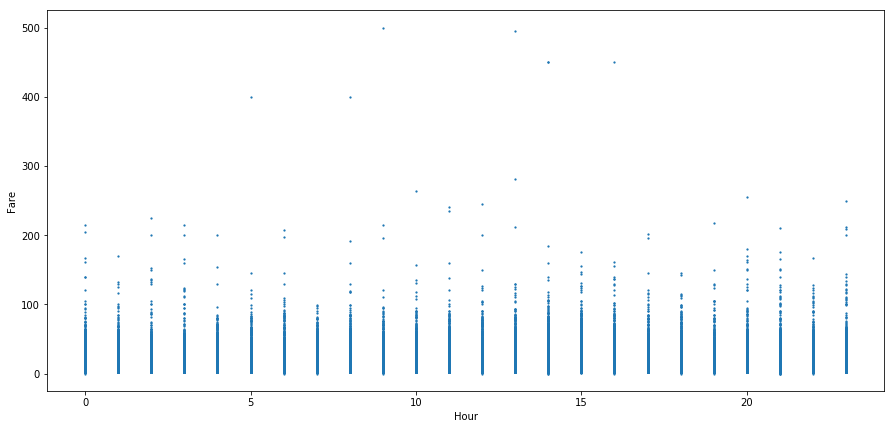

In [57]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

**3. Does the day of the week affect the fare?**

Text(0, 0.5, 'Frequency')

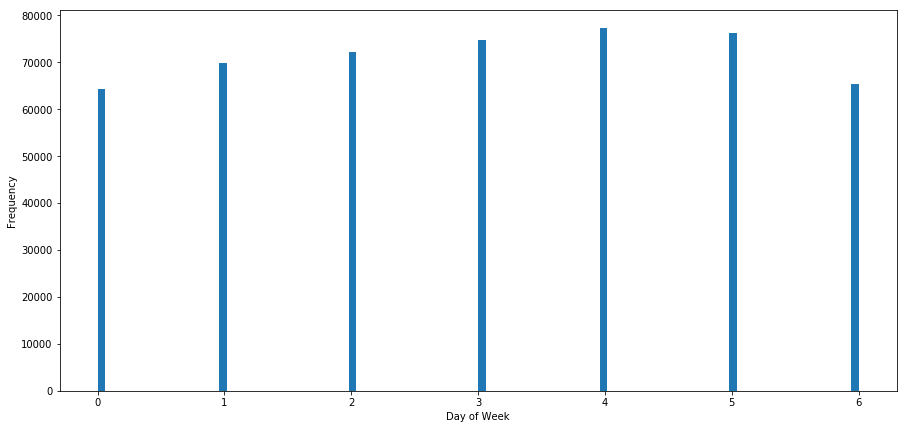

In [58]:
plt.figure(figsize=(15,7))
plt.hist(train['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

The day of the week doesn't seem to influence the number of cab rides

Text(0, 0.5, 'Fare')

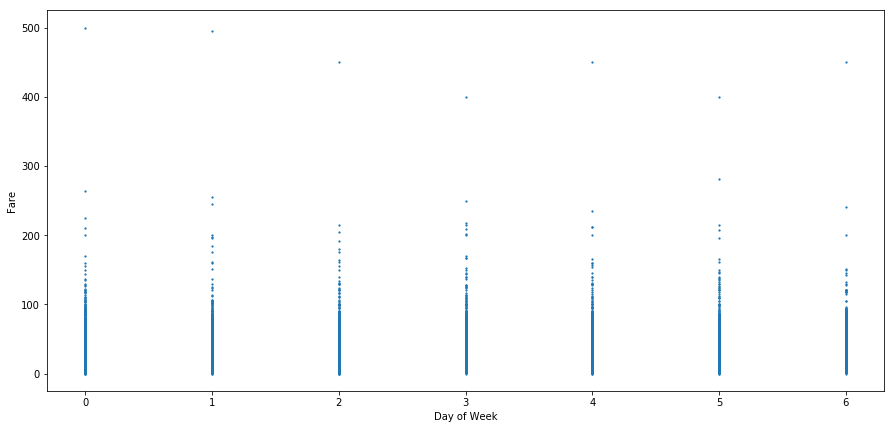

In [59]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day of Week'], y=train['fare_amount'], s=1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare')

**4. Does the distance affect the fare?**

It is an obvious statement but let's visualise it.

Firstly, let's check the frequency of the distances that we calculated using Haversine formula. We will do so by creating bins (0-10 kms, 10-20 kms, and so on, and check for any outliers)

In [60]:
train.sort_values(['H_Distance','fare_amount'], ascending=False).head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
269695,2012-05-24 09:00:00.000000101,17.7,2012-05-24 09:00:00,-73.997572,40.720945,-1329.621332,40.773717,1,10942.515639,2012,5,24,3,9
401445,2011-02-26 03:28:03.000000600,14.5,2011-02-26 03:28:03,0.000000,0.000000,-75.433371,40.752047,1,8786.235625,2011,2,26,5,3
207647,2011-04-19 17:56:04.000000300,38.9,2011-04-19 17:56:04,0.000000,0.000000,-75.423754,40.773877,1,8785.843243,2011,4,19,1,17
336392,2011-05-11 20:06:55.000000600,34.5,2011-05-11 20:06:55,0.000000,0.000000,-75.294555,40.699667,1,8773.725816,2011,5,11,2,20
419362,2011-04-03 13:59:31.000000200,5.7,2011-04-03 13:59:31,0.000000,0.000000,-74.689831,40.190564,1,8713.610002,2011,4,3,6,13


In [61]:
len(train)

499959

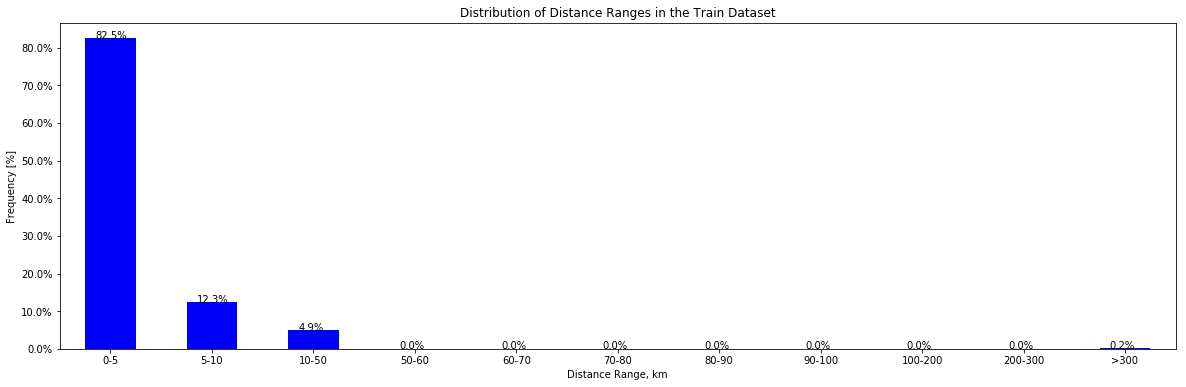

In [62]:
total = len(train)*1.
labels = ['0-5','5-10','10-50','50-60','60-70','70-80','80-90','90-100','100-200','200-300','>300']
bins=[0.0, 5.0, 10.0, 50.0, 60.0, 70.0, 80.0 ,90.0, 100.0, 200.0, 300.0, np.inf]
plt.figure(figsize=(12,5))
out = pd.cut(train['H_Distance'], bins=bins, labels=labels,include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(20,6))
plt.xlabel('Distance Range, km')
plt.ylabel('Frequency [%]')
plt.title('Distribution of Distance Ranges in the Train Dataset')
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))


In [63]:
train.groupby(pd.cut(train['H_Distance'], bins=bins, labels=labels)).size()

H_Distance
0-5        398289
5-10        61569
10-50       24698
50-60           7
60-70           5
70-80           3
80-90           8
90-100         53
100-200        88
200-300         3
>300          986
dtype: int64

There are values which are greater than 100 kms! In NYC it is unlikely that passengers would take cabs to travel more than a 100 kms. These outliers could be because of typos or missing values in the latitude or longitude. Remove fields of the following:
1.  Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is 0
2. vice versa of point 1.
3. Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is not 0.

In [64]:
#Pickup latitude and longitude = 0
train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [65]:
train = train.drop(train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)].index, axis=0)

In [66]:
train.shape

(499959, 14)

In [67]:
#Checking in test data
test.loc[((test['pickup_latitude']==0) & (test['pickup_longitude']==0))&((test['dropoff_latitude']!=0) & (test['dropoff_longitude']!=0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [68]:
#Dropoff latitude and longitude = 0
train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [69]:
train = train.drop(train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)].index, axis=0)

In [70]:
train.shape

(499959, 14)

In [71]:
idx2drop = train.loc[(train['pickup_latitude']==0) | (train['pickup_longitude']==0) | (train['dropoff_latitude']==0) | (train['dropoff_longitude']==0)].index
print('Candidates for drop', idx2drop.shape[0])

Candidates for drop 9889


In [72]:
train.drop(index=idx2drop, inplace=True)

In [73]:
train.shape

(490070, 14)

**Airports distance analysis**
<br>
The roled played by nearby airports could offer important insights for the analysis

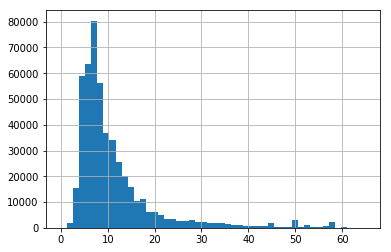

In [74]:
train[train.fare_amount < 65].fare_amount.hist(bins=50)

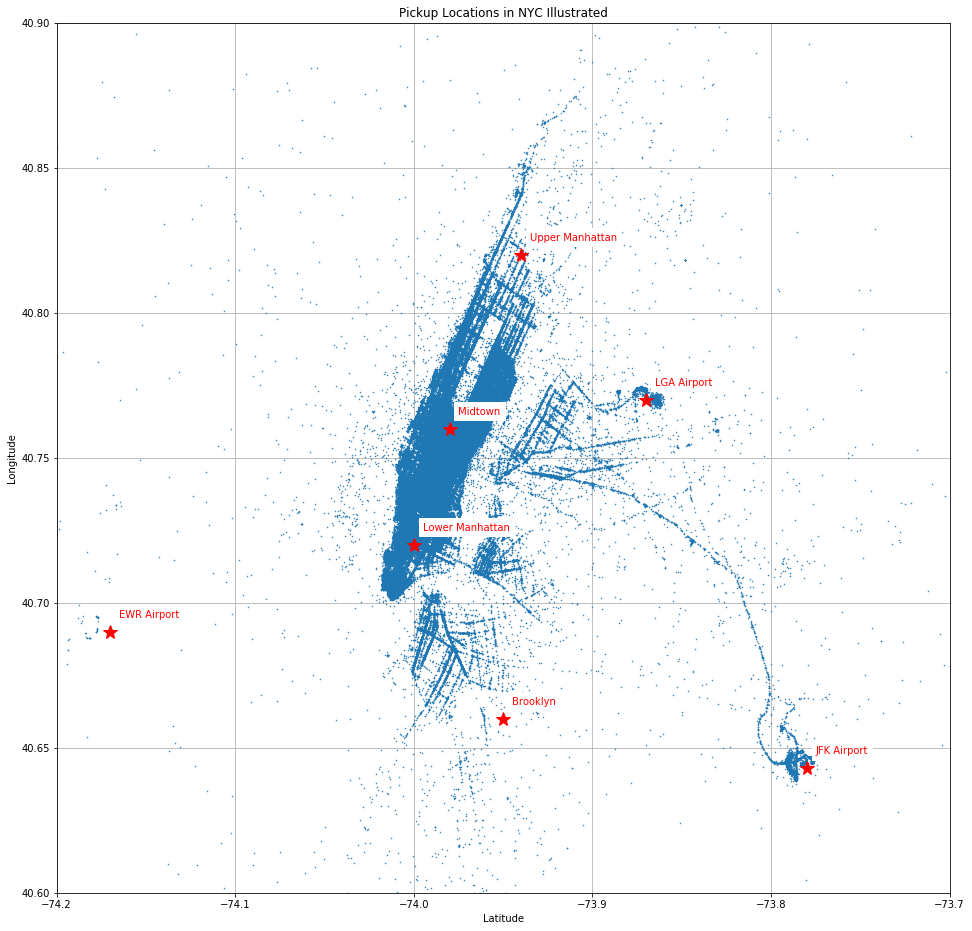

In [75]:
landmarks = {'JFK Airport': (-73.78, 40.643),
             'LGA Airport': (-73.87, 40.77),
             'EWR Airport': (-74.17, 40.69),
             'Midtown': (-73.98, 40.76),
             'Lower Manhattan': (-74.00, 40.72),
             'Upper Manhattan': (-73.94, 40.82),
             'Brooklyn': (-73.95, 40.66)}


import matplotlib.pyplot as plt

def plot_lat_long(df, landmarks, points='Pickup'):
    plt.figure(figsize = (16,16)) # set figure size
    if points == 'Pickup':
        plt.plot(list(df.pickup_longitude), list(df.pickup_latitude), 
                 '.', markersize=1)
    else:
        plt.plot(list(df.dropoff_longitude), list(df.dropoff_latitude), 
                 '.', markersize=1)

    for landmark in landmarks:
        plt.plot(landmarks[landmark][0], landmarks[landmark][1], 
                '*', markersize=15, alpha=1, color='r') 
        plt.annotate(landmark, (landmarks[landmark][0]+0.005, 
                     landmarks[landmark][1]+0.005), color='r', 
                     backgroundcolor='w') 
 
    plt.title("{} Locations in NYC Illustrated".format(points))
    plt.grid(None)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.xlim(-74.2, -73.7)
    plt.ylim(40.6, 40.9)
    plt.show()

plot_lat_long(train, landmarks)

In [76]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7


In [77]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,2015,1,27,1,13
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21


**Zero Values for distance and fare:**
<br>
For 0 distance and 0 fare, we can disregard these entries as they are not adding value to the analysis.

In [78]:
train[(train['H_Distance']==0)&(train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
331597,2013-08-05 06:45:54.000000500,0.0,2013-08-05 06:45:54,-73.982354,40.679971,-73.982354,40.679971,1,0.0,2013,8,5,0,6
436658,2015-03-04 22:33:39.000000800,0.0,2015-03-04 22:33:39,-74.043442,40.788208,-74.043442,40.788208,1,0.0,2015,3,4,2,22


In [79]:
train = train.drop(train[(train['H_Distance']==0)&(train['fare_amount']==0)].index, axis = 0)
train[(train['H_Distance']==0)].shape

(5254, 14)

As in New York a minimum of $2.50 is charged per ride (Google search), fare values smaller than that can't be accurate for distances greater than 0 KM. Therefore they can be removed as incorrect.

Also when the fare is 0, but distance is not 0. It could be possible to impute a value using a linear function of the distance y = ax + b with respect to the fare "x" assigning an arbitrary "a" where "b" is the minimum starting fare $2.50. Considering the wide dataset we can avoid such a guess and drop the rows instead.

In [80]:
train.shape

(490068, 14)

In [81]:
train.drop(index=train[train['fare_amount']<2.50].index, inplace=True)

Fare is greater than $2.50, but Distance is 0. Multiple scenarios are possible (e.g. waiting for passenger, missing values...). Without further information we have kept these values as they are.

In [82]:
train.shape

(490052, 14)

<a id='modelling'></a>

# Part 2: Modelling

**Train and Validation splits:**

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
y=train['fare_amount']
X=train.drop(['key','pickup_datetime','fare_amount'], axis = 1)
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25,random_state=123) #test_size is the proportion of data that is to be kept aside for validation
X_test = test.drop(['key','pickup_datetime'], axis = 1)

Inspired by https://medium.com/analytics-vidhya/machine-learning-to-predict-taxi-fare-part-two-predictive-modelling-f80461a8072e

**RF Model Evaluation**

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 883,n_jobs=-1)
rf.fit(X_train,y_train)
rf_pred= rf.predict(X_val)
rf_rmse=np.sqrt(mean_squared_error(rf_pred, y_val))
rf_train_rmse=np.sqrt(mean_squared_error(rf.predict(X_train), y_train))
rf_variance=abs(rf_train_rmse - rf_rmse)
print("RMSE for Random Forest is ",rf_rmse)
print("Bias for Random Forest is ",rf_train_rmse)
print("Variance for Random Forest is ",rf_variance)

RMSE for Random Forest is  4.119176670256823
Bias for Random Forest is  1.6374418814176759
Variance for Random Forest is  2.481734788839147


**LightGBM Model Evaluation**

In [85]:
import lightgbm as lgb
train_data=lgb.Dataset(X_train,label=y_train)
param = {'num_leaves':60, 'objective':'regression'}
param['metric'] = 'l2_root'
num_round=5000
cv_results = lgb.cv(param, train_data, num_boost_round=num_round, nfold=10,verbose_eval=20, early_stopping_rounds=20,stratified=False)
lgb_bst=lgb.train(param,train_data,len(cv_results['rmse-mean']))
lgb_pred = lgb_bst.predict(X_val)
lgb_rmse=np.sqrt(mean_squared_error(lgb_pred, y_val))
lgb_train_rmse=np.sqrt(mean_squared_error(lgb_bst.predict(X_train), y_train))
lgb_variance=abs(lgb_train_rmse - lgb_rmse)
print("RMSE for Light GBM is ",lgb_rmse)
print("Bias for Light GBM is ",lgb_train_rmse)
print("Variance for Light GBM is ",lgb_variance)

[20]	cv_agg's rmse: 4.63785 + 0.298731
[40]	cv_agg's rmse: 4.36825 + 0.307314
[60]	cv_agg's rmse: 4.30757 + 0.309269
[80]	cv_agg's rmse: 4.28275 + 0.310407
[100]	cv_agg's rmse: 4.27096 + 0.309713
[120]	cv_agg's rmse: 4.26317 + 0.310044
[140]	cv_agg's rmse: 4.25915 + 0.311033
[160]	cv_agg's rmse: 4.25741 + 0.312445
[180]	cv_agg's rmse: 4.25566 + 0.312578
[200]	cv_agg's rmse: 4.25582 + 0.312389
RMSE for Light GBM is  4.006892908586611
Bias for Light GBM is  3.5638131729309306
Variance for Light GBM is  0.4430797356556804


 A good model has low bias and variance to avoid overfitting. This model gave an RMSE of 4.00 on validation data but the bias is higher than Random Forest. On the other hand, the variance of this model was 0.44 as compared to 2.48 in our Random Forest model. Since Light GBM has a comparable error rate to Random Forest, and has a lower variance and runs faster than the latter, we will use LightGBM as our model for further analysis.

**Hyperparameters optimization for LightGBM:**

In [89]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn.metrics import mean_squared_error

def objective(space):
  clf = lgb.LGBMRegressor(
          objective = 'regression',
          n_jobs = -1, # Updated from 'nthread'
          verbose=1,
          boosting_type='gbdt',
          num_leaves=60,
          bagging_freq=20,
          subsample_freq=100,
          max_depth=int(space['max_depth']),
          subsample=space['subsample'],
          n_estimators=5000,
          colsample_bytree=space['colsample'])
          #metric='l2_root')
  eval_set=[( X_train, y_train), ( X_test,y_test)]
  clf.fit(X_train, np.array(y_train),
          eval_set=eval_set,eval_metric='rmse',
          verbose=0,
          early_stopping_rounds=20)
  pred = clf.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, pred))
  # print("SCORE:", rmse)
  return{'loss':rmse, 'status': STATUS_OK }

space ={
        'max_depth': hp.quniform("x_max_depth", 5, 30, 3),
        'subsample': hp.uniform ('x_subsample', 0.8, 1),
        'colsample':hp.uniform ('x_colsample', 0.3, 1)
    }
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)
print(best)

  0%|                                                                            | 0/100 [00:00<?, ?it/s, best loss: ?]


NameError: name 'y_test' is not defined

Optimization parameters:

100%|██████████| 100/100 [22:44<00:00, 13.47s/it, best loss: 3.982033500820807]

*{'x_colsample': 0.9964857570398692, 'x_max_depth': 15.0, 'x_subsample': 0.953412817672432}*

In [87]:
train_data=lgb.Dataset(X_train,label=y_train)
param = {'num_leaves':60,
         'objective':'regression',
         'subsample':0.953412817672432,
         'colsample_bytree':0.9964857570398692, 
         'max_depth':15,
         'metric':'l2_root',
         'bagging_freq':20,
         'subsample_freq':100,
         }
num_round=5000
cv_results = lgb.cv(param, train_data, num_boost_round=num_round, nfold=10,verbose_eval=20, early_stopping_rounds=20,stratified=False)
lgb_bst=lgb.train(param,train_data,len(cv_results['rmse-mean']))
lgb_pred = lgb_bst.predict(X_val)
lgb_rmse=np.sqrt(mean_squared_error(lgb_pred, y_val))
print("RMSE for Light GBM is ",lgb_rmse)

[20]	cv_agg's rmse: 4.63939 + 0.301175
[40]	cv_agg's rmse: 4.36589 + 0.312427
[60]	cv_agg's rmse: 4.31071 + 0.312994
[80]	cv_agg's rmse: 4.28428 + 0.319321
[100]	cv_agg's rmse: 4.27197 + 0.317552
[120]	cv_agg's rmse: 4.26078 + 0.318196
[140]	cv_agg's rmse: 4.25902 + 0.315293
[160]	cv_agg's rmse: 4.25733 + 0.314555
RMSE for Light GBM is  4.003398868328602


In [88]:
lgb_test = lgb_bst.predict(X_test)
print(lgb_test)

[10.53156848 10.85535084  4.75837122 ... 54.09277046 19.80250834
  6.79343077]
